<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Илья! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Определение возраста покупателей

## Исследовательский анализ данных

### Описание проекта <br>
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. <br>Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:<br>
анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;<br>
контролировать добросовестность кассиров при продаже алкоголя.<br>
Постройте модель, которая по фотографии определит приблизительный возраст человека. <br> В вашем распоряжении набор фотографий людей с указанием возраста.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
datagen  = ImageDataGenerator(rescale=1./255)
data_images = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменных train_datagen  и train_gen_flow. На мой взгляд они не соответсвуют тому, что в них, ведь ты еще не производишь разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
labels.shape

(7591, 2)

In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Теперь ты знаешь количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<b> Достаточно ли имеющихся данных? </b> Я думаю сложно сказать на данном этапе достаточно или не достаточно данных, только после того, как обучаешь разные архитектуры, разные гиперпараметры используешь, аугментации, если везде получается прям плохое качество, но ты понимаешь, что задача должна решаться - как вариант: мало данных, но просто чаще всего в реальной жизни в CV у нас нет бесконечности данных и ты работаешь с тем набором картинок, который у тебя есть. <br>
Так как Данные взяты с сайта ChaLearn Looking at People, то думаю данных достаточно), для достижения нужного нам результата. 

<b>Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, Какие шаги мы можем предпринять в связи с этим?</b> Cледующим шагом при реальном анализе был бы подбор подходящего метода,модели,и гиперпараметров.

In [6]:
labels.head(10)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [7]:
display(labels.describe())

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


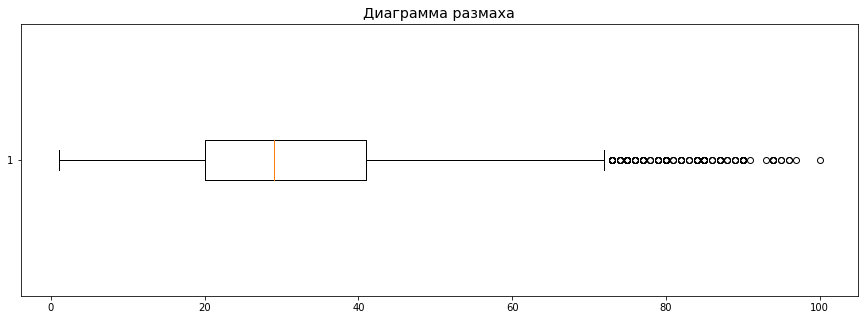

In [8]:
plt.figure(figsize=(15,5))
plt.title('Диаграмма размаха', fontsize='x-large')
plt.boxplot(labels['real_age'], vert=False)
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Почти все люди в возрасте от 20 до 40 лет.

In [9]:
labels['real_age'].value_counts()

30     317
25     315
27     229
26     226
28     217
      ... 
96       2
93       1
100      1
91       1
97       1
Name: real_age, Length: 97, dtype: int64

Посмотрим на графике

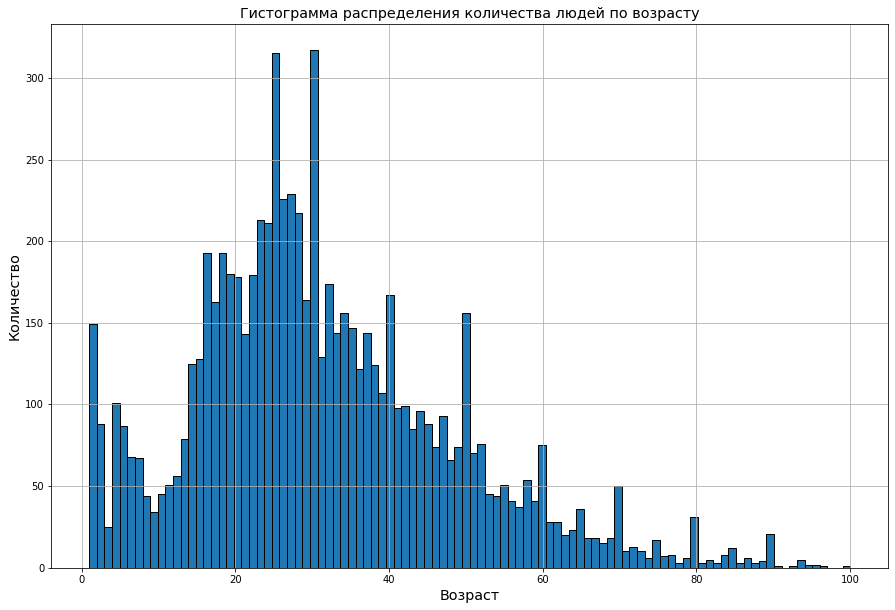

In [10]:
plt.figure(figsize=(15,10))
labels['real_age'].plot.hist(bins=100, grid=True, edgecolor='black')
plt.title('Гистограмма распределения количества людей по возрасту', fontsize='x-large')
plt.xlabel('Возраст', fontsize='x-large')
plt.ylabel('Количество', fontsize='x-large')
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Информативная гистограмма. Рекомендую увеличить количество корзин (bins) до 100, это поможет лучше увидеть некоторые особенности наших данных.</div>

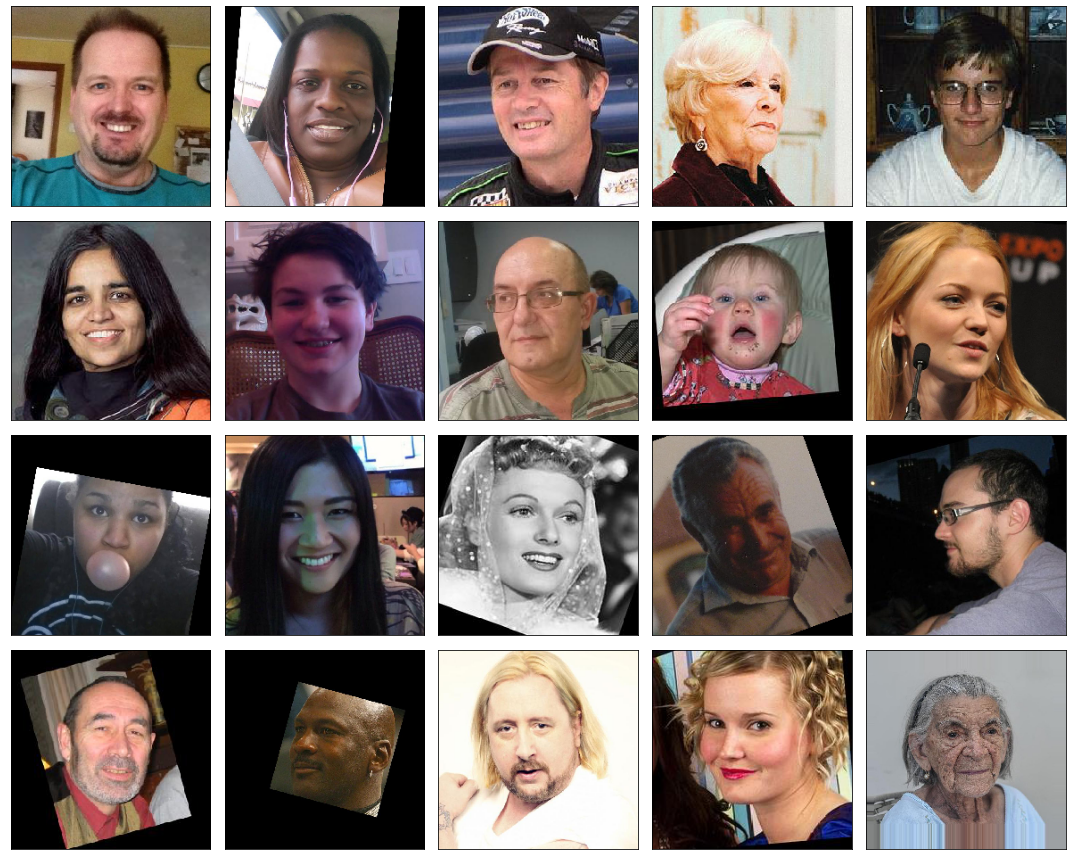

In [11]:
features, target = next(data_images)

fig = plt.figure(figsize=(15,15))
for i in range(20):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Кстати, можно дополнительно вывести возраст человека на фото, он содержится в переменной target. </div>

Вывод:<br>
Некоторые фотографии искажены и смещены,немного повернуты. Предварительная аугментация не требуется, что указзанно по заданию. <br> Размер изображений отличается, но при обработке это учтено.<br>
Исходя из полученных графиков, большинство людей в датасете в возрасте от 20 до 40.<br> 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, ты произвел EDA и сформулировал выводы. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но вот с аугментацией ты не прав. На самом деле в работе с компьютерным зрением использовать аугментацию крайне полезно. Хотя отладку работоспособности кода и первую точнось можно получить и без неё.    

</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

 ```python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50





#######
def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255. ,
                                       #horizontal_flip =True, 
                                       #vertical_flip=True ,
                                       #rotation_range = 90 , 
                                       width_shift_range = 0.2 ,
                                       height_shift_range =0.2 
                                       )
    labels = pd.read_csv(f'{path}labels.csv')
    train_datagen_flow = train_datagen.flow_from_dataframe(  dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
   
    return train_datagen_flow 

#######
def load_test(path):
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)
    labels = pd.read_csv(f'{path}labels.csv')

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_datagen_flow


def create_model(input_shape):
    optimizer = Adam(learning_rate=0.0001)


    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    #один нейрон
    model.add(Dense(1, activation='relu')) 
    
    model.compile(optimizer=optimizer, loss='mse',  metrics=['mae']) 

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):


    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model
```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую использовать аугментацию для обучающего набора, (попробуй только отражение по горизонтали) и немного добавить эпох.

</div>

```
Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 108s - loss: 285.2480 - mae: 12.0786 - val_loss: 984.9804 - val_mae: 26.6557
Epoch 2/10
178/178 - 91s - loss: 89.2394 - mae: 7.1376 - val_loss: 872.6511 - val_mae: 24.4135
Epoch 3/10
178/178 - 89s - loss: 61.0363 - mae: 5.9589 - val_loss: 298.7455 - val_mae: 12.4885
Epoch 4/10
178/178 - 89s - loss: 45.4263 - mae: 5.1827 - val_loss: 122.3376 - val_mae: 8.3278
Epoch 5/10
178/178 - 89s - loss: 33.7371 - mae: 4.4908 - val_loss: 86.2400 - val_mae: 6.9578
Epoch 6/10
178/178 - 89s - loss: 31.5691 - mae: 4.3250 - val_loss: 118.2851 - val_mae: 8.3240
Epoch 7/10
178/178 - 89s - loss: 26.8726 - mae: 4.0244 - val_loss: 89.6241 - val_mae: 7.0459
Epoch 8/10
178/178 - 88s - loss: 23.4531 - mae: 3.7219 - val_loss: 80.5096 - val_mae: 6.6477
Epoch 9/10
178/178 - 89s - loss: 19.7730 - mae: 3.4352 - val_loss: 71.4041 - val_mae: 6.4519
Epoch 10/10
178/178 - 89s - loss: 18.8400 - mae: 3.3447 - val_loss: 70.5587 - val_mae: 6.1958
60/60 - 10s - loss: 70.5587 - mae: 6.1958
Test MAE:1958 6.

```

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
Новая модель
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50





#######
def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255. ,
                                       horizontal_flip =True, 
                                       #vertical_flip=True ,
                                       #rotation_range = 90 , 
                                       width_shift_range = 0.2 ,
                                       height_shift_range =0.2 
                                       )
    labels = pd.read_csv(f'{path}labels.csv')
    train_datagen_flow = train_datagen.flow_from_dataframe(  dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
   
    return train_datagen_flow 

#######
def load_test(path):
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)
    labels = pd.read_csv(f'{path}labels.csv')

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_datagen_flow


def create_model(input_shape):
    optimizer = Adam(learning_rate=0.0001)


    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    #один нейрон
    model.add(Dense(1, activation='relu')) 
    
    model.compile(optimizer=optimizer, loss='mse',  metrics=['mae']) 

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=15,
               steps_per_epoch=None, validation_steps=None):


    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
результат
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
Не сильно что-то поменялось
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> Твоя модель уверенно показывала метрики ниже 6.. Учитывая что теоретический минимум на этих данных примерно 5,4 это хороший результат. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

## Анализ обученной модели

Мы обучили архитектуру ResNet50,предобученной на ImageNet c слоями GlobalAveragePooling2D — пулинг с окном во весь тензор и Dense - полносвязный слой для классификации. ResNet-50 является сверточной нейронной сетью, которой имеет 50 слоёв глубины, свёртки небольшого размера и bottleneck-блоки. Использовали оптимизатор Adam так как он Быстрее всех находит минимум, использовали модели с 10 и 15 эпохами и отображением по горизонтали, размер батча равен 32, заморозка параметров не использовалась.<br>
По заданию нужно было достичь значение MAE меньше 7 - Модель  преодолела планку требуемой точности. 


В среднем модель ошибается на 6 лет, что конечно может быть критично для определения возраста человека, например - исполнилось ли человеку 18 лет?. Модель стоит не много до работать ли использовать налюдях страше 25 лет.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом разделе стоит подробно расписать используемые для создания и обучения модели подходы:
    
 - Использованная архитектура (бэкбон + голова), а также загружались ли предобученные  или рандомные веса.
 - Параметры обучения: размер батча, оптимизатор, использовалась ли заморозка весов бэкбона,  количество эпох.
 - Достигнутые метрики, наблюдалось ли переобучение.
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
    
Пожалуйта добавь название гистограмме.  В остальном все без критичных замечаний.
    
    
Жду твой проект на финальное ревью :)
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
Спасибо за ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> дополнительные материалы </b>
В курсе уже есть ссылки на отдельные статьи. Со своей стороны поделюсь неплохими бесплатными курсами по нейронкам, дающим целостную картинку.
    
   - "Дип Лернинг на пальцах" (https://www.youtube.com/playlist?list=PL5FkQ0AF9O_o2Eb5Qn8pwCDg7TniyV1Wb).
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка.
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  

</div>